# Classifying Fashion-MNIST

Build and train a neural network for image classification on the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. 

(MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.)

<img src='assets/fashion-mnist-sprite.png' width=500px>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-libraries-and-data" data-toc-modified-id="Load-libraries-and-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load libraries and data</a></span></li><li><span><a href="#Build-the-network" data-toc-modified-id="Build-the-network-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Build the network</a></span></li><li><span><a href="#Train-and-test-the-network" data-toc-modified-id="Train-and-test-the-network-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Train and test the network</a></span></li></ul></div>

## Load libraries and data

In [10]:
import numpy as np

import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

26427392it [00:01, 18967951.38it/s]                              


Extracting C:\Users\r2d4/.pytorch/F_MNIST_data/FashionMNIST\raw\train-images-idx3-ubyte.gz to C:\Users\r2d4/.pytorch/F_MNIST_data/FashionMNIST\raw


32768it [00:00, 460853.49it/s]


Extracting C:\Users\r2d4/.pytorch/F_MNIST_data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\r2d4/.pytorch/F_MNIST_data/FashionMNIST\raw


4423680it [00:00, 23066935.60it/s]                           


Extracting C:\Users\r2d4/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\r2d4/.pytorch/F_MNIST_data/FashionMNIST\raw


8192it [00:00, 147486.31it/s]


Extracting C:\Users\r2d4/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\r2d4/.pytorch/F_MNIST_data/FashionMNIST\raw
Processing...
Done!


Here we can see one of the images.

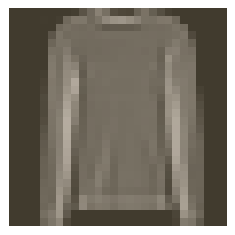

In [3]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Build the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [21]:
# Define network architecture
class Network(nn.Module):
    def __init__(self):
        super().__init__()

        # Define 3 hidden, 1 output layer
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        # make sure the input tensor is flattened
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

## Train and test the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [22]:
# Create the network, define the criterion and optimizer
model = Network()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

# Check
print(model)

Network(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [23]:
# Train the network
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
#         images = images.view(images.shape[0], -1)  # flattening in forward pass
        
        # Training pass

        log_probs = model.forward(images)  # you can also shortcut without 'forward'
        loss = criterion(log_probs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()        
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 2.172701716041768
Training loss: 1.2748208756385835
Training loss: 0.7961652521004301
Training loss: 0.6692262351004554
Training loss: 0.6088338321142359


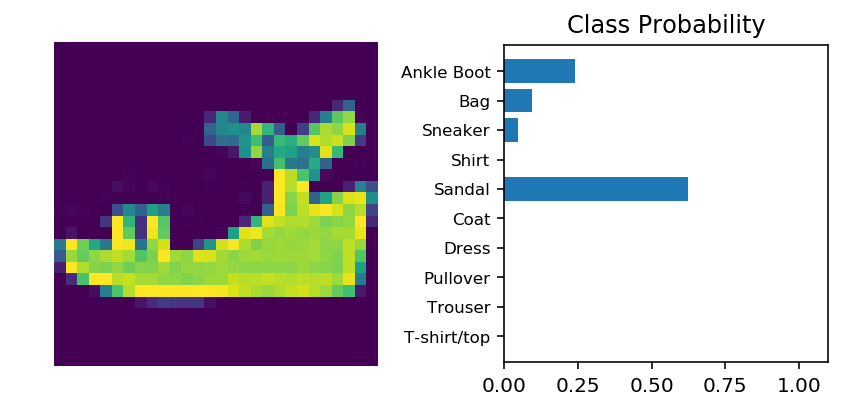

In [27]:
# Test the network
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model.forward(img))  # don't forget to call the exp

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

---